1. Import Library dan Membaca dataset

In [35]:
import pandas as pd 
from sklearn import datasets

# memuat dataset iris dari scikit-learn dan mengonversinya menjadi dataframe
iris =datasets.load_iris()

x = iris.data  # inputan untuk machinelearning
y = iris.target  #output yang diinginkan dari machine learning 

# mengoversi data fitur dan target menjadi datafrane
df_x = pd.DataFrame(x, columns=iris.feature_names)
df_y= pd.Series(y, name='target')

# meggabungkan fitur dan target dalam satu dataframe
df = pd.concat([df_x, df_y], axis=1)

df.head(50)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [9]:
df['target'].unique()


array([0, 1, 2])

In [10]:
df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


2. Split Data


In [30]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=50)

In [25]:
print(y_train.shape)
print(type(y_train))

(120,)
<class 'pandas.core.series.Series'>


3. Training Model

In [31]:
from sklearn.tree import DecisionTreeClassifier

# Membuat dan melatih model Decision Tree
model = DecisionTreeClassifier(random_state=50)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=50)

4. Prediksi dan Evaluasi Model

In [32]:
from sklearn.metrics import accuracy_score,classification_report

# 4. Memprediksi dan mengevaluasi
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred))
print(f"Akurasi: {accuracy * 100:.2f}%")

Laporan Klasifikasi:
Akurasi: 96.67%


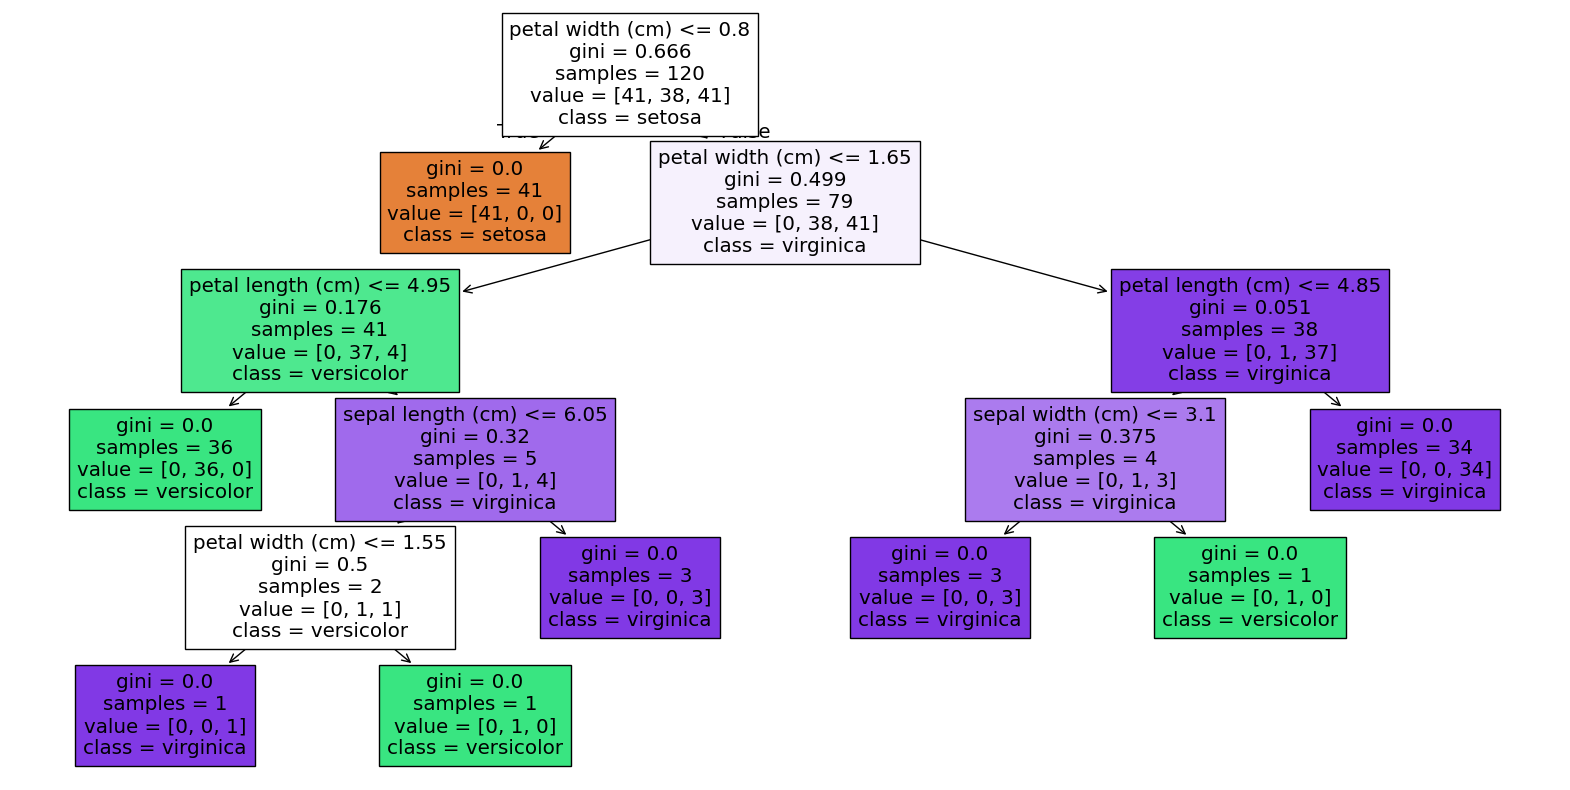

In [33]:
import matplotlib.pyplot as plt
from sklearn import tree

# Visualisasi decission tree (opsional)
plt.figure(figsize=(20,10))
tree.plot_tree(model,
               feature_names=iris.feature_names,
               class_names=iris.target_names,
               filled=True)
plt.show()